***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [86]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [87]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [88]:
salario_min = 788
classes = [
    dados["Renda"].min(),
    2 * salario_min,
    5 * salario_min,
    15 * salario_min,
    25 * salario_min,
    dados["Renda"].max(),
]

### 2º Definir os labels das classes

In [89]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [90]:
dados['Classe'] = pd.cut(x=dados.Renda, bins=classes, labels=labels, include_lowest=True)
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classe
0,11,0,23,8,12,800,1.603808,E
1,11,1,23,2,12,1150,1.739790,E
2,11,1,35,8,15,880,1.760444,E
3,11,0,46,2,6,3500,1.783158,D
4,11,1,47,8,9,150,1.690631,E
...,...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030,E
76836,53,0,30,4,7,1500,1.792934,E
76837,53,0,32,8,12,1300,1.830587,E
76838,53,0,57,8,4,1500,1.726344,E


In [91]:
frequencia = dados['Classe'].value_counts()
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Classe, dtype: int64

### 4º Construir a coluna de percentuais

In [92]:
percentual = dados['Classe'].value_counts(normalize=True)
percentual

E    0.647514
D    0.242087
C    0.094235
B    0.010698
A    0.005466
Name: Classe, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [93]:
distribuicao = pd.DataFrame({'Frequência': frequencia, 'Percentual (%)': percentual * 100})
distribuicao

,Frequência,Percentual (%)
E,49755,64.751432
D,18602,24.208745
C,7241,9.423477
B,822,1.069755
A,420,0.546590


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

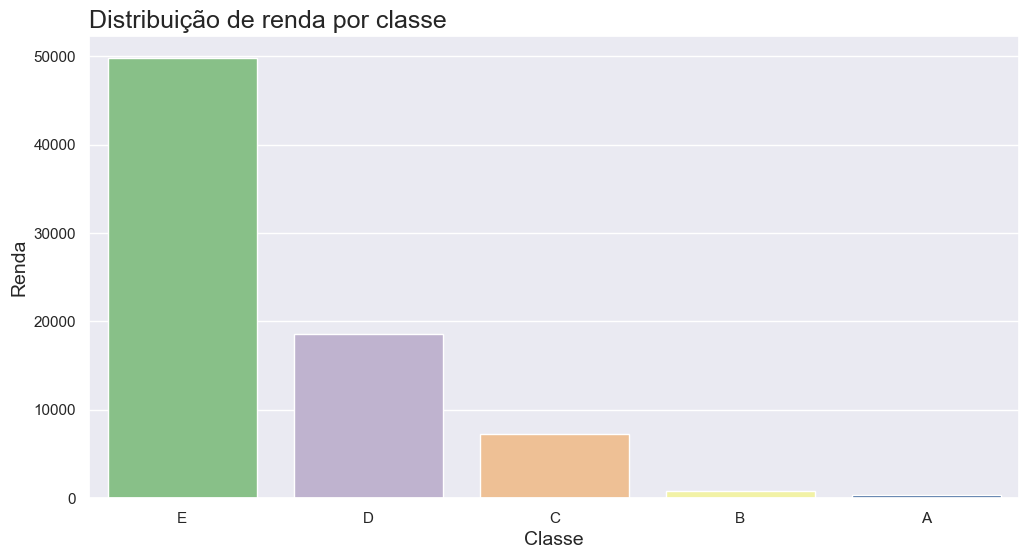

In [94]:
sns.set_theme(style='darkgrid', palette='Accent')

plot = sns.barplot(x=distribuicao.index, y='Frequência', data=distribuicao)
plot.set_title('Distribuição de renda por classe', loc='left', fontsize=18)
plot.set_xlabel('Classe', fontsize=14)
plot.set_ylabel('Renda', fontsize=14)
plot.figure.set_size_inches(12,6)

> ### Conclusões

Com base nos dados apresentados, podemos observar que a maioria da população (64.75%) está na classe "E", que possui a menor renda. Isso indica que uma parcela significativa da população está em situação de baixa renda.

Por outro lado, a classe "A", que representa a parcela da população com a maior renda, tem a menor frequência, com apenas 0.55% da população. Isso sugere uma desigualdade de renda, em que uma pequena parcela da população detém a maior parte da riqueza.

As classes intermediárias ("D", "C" e "B") têm frequências e percentuais menores, o que indica uma distribuição gradual da renda na população. A classe "D" representa 24.21% da população, a classe "C" representa 9.42% e a classe "B" representa 1.07%.

Esses dados apontam para uma concentração de renda significativa nas classes mais baixas, o que pode indicar desafios econômicos e sociais, como pobreza, desigualdade e falta de acesso a recursos e oportunidades para uma parte substancial da população. Por outro lado, a pequena porcentagem da população na classe "A" sugere a presença de uma elite econômica privilegiada.

É importante ressaltar que uma análise completa da distribuição de renda requer uma avaliação mais ampla e detalhada, levando em consideração outros fatores, como a variação geográfica, o custo de vida e as condições socioeconômicas específicas de cada região ou país.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset

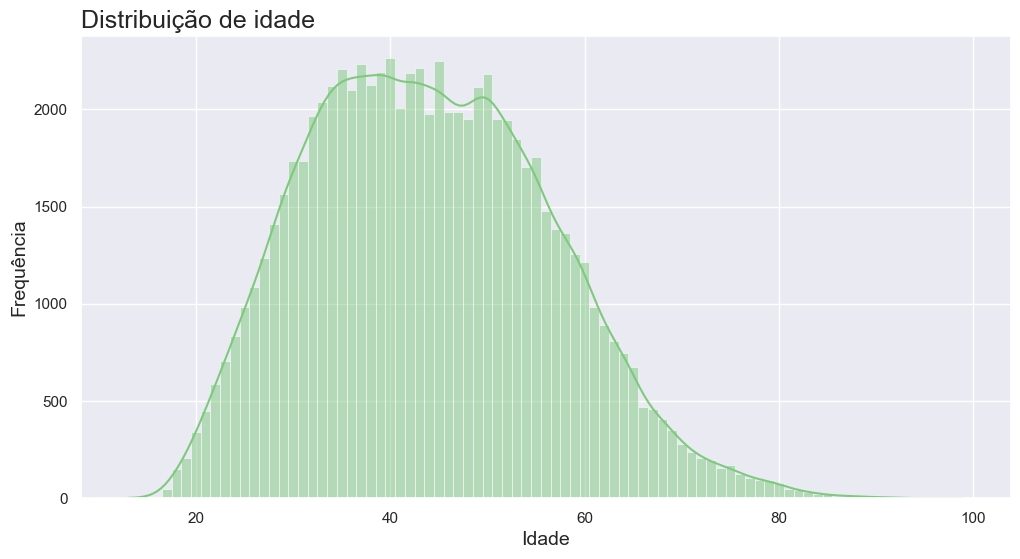

In [95]:
sns.set_theme(style='darkgrid', palette='Accent')

plot = sns.histplot(data=dados, x='Idade', discrete=True, kde=True)
plot.set_title('Distribuição de idade', loc='left', fontsize=18)
plot.set_xlabel('Idade', fontsize=14)
plot.set_ylabel('Frequência', fontsize=14)
plot.figure.set_size_inches(12,6)

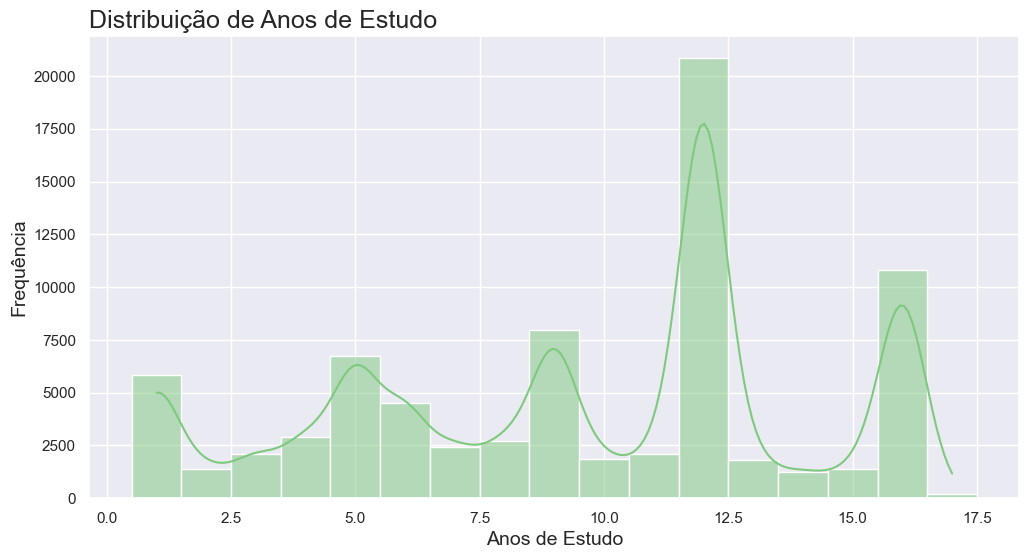

In [96]:
plot = sns.histplot(data=dados, x='Anos de Estudo', discrete=True, kde=True)
plot.set_title('Distribuição de Anos de Estudo', loc='left', fontsize=18)
plot.set_xlabel('Anos de Estudo', fontsize=14)
plot.set_ylabel('Frequência', fontsize=14)
plot.figure.set_size_inches(12,6)

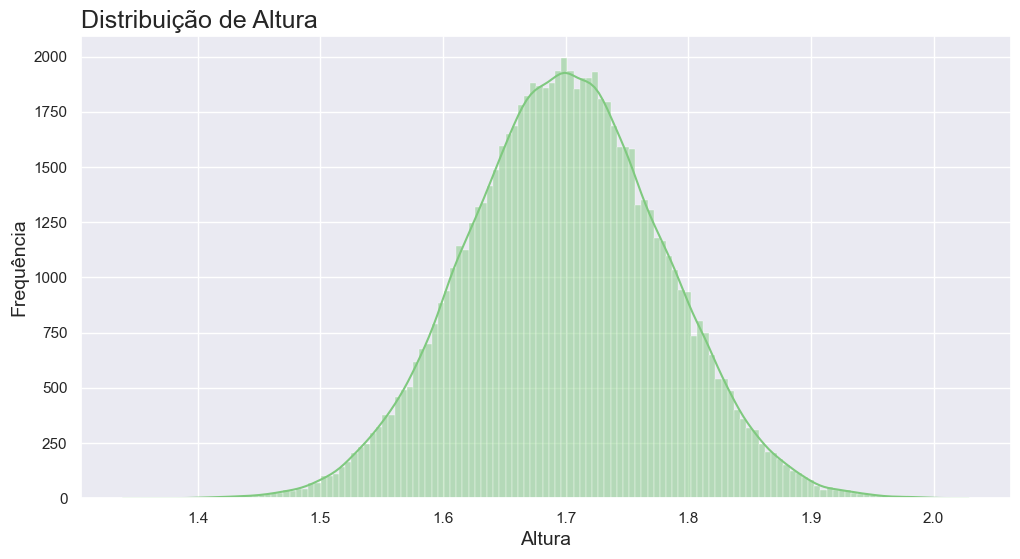

In [97]:
plot = sns.histplot(data=dados, x='Altura', kde=True)
plot.set_title('Distribuição de Altura', loc='left', fontsize=18)
plot.set_xlabel('Altura', fontsize=14)
plot.set_ylabel('Frequência', fontsize=14)
plot.figure.set_size_inches(12,6)

> ### Conclusões

A partir do histograma, podemos observar que tanto a variável "Idade" quanto "Altura" apresentam uma distribuição simétrica. Isso implica que a relação entre a média, mediana e moda dessas variáveis pode ser dada por:

$$média = mediana = moda$$

Quanto a variável "Anos de Estudo", é observada uma assimetria à esquerda, que implica em:

$$média < mediana < moda$$

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

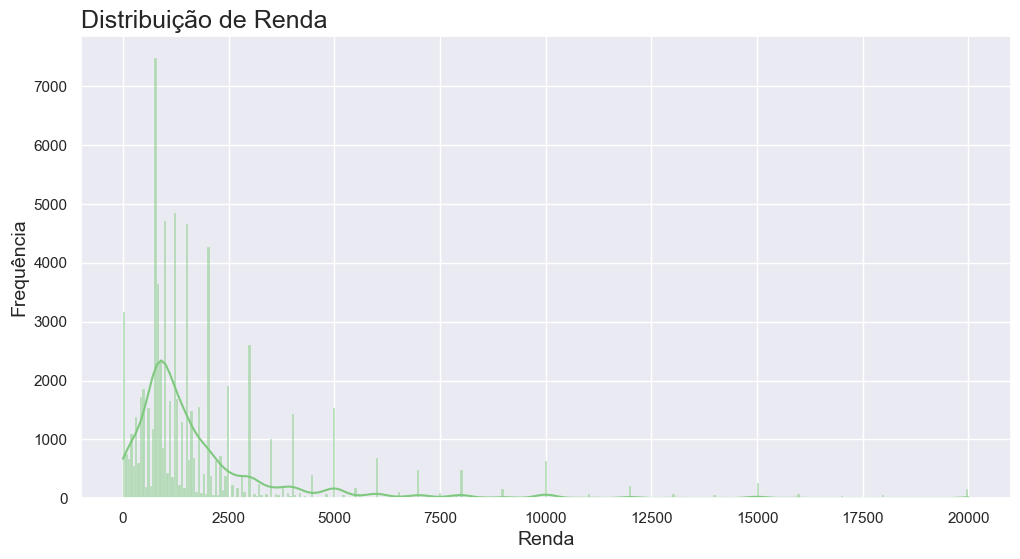

In [98]:
mask = dados['Renda'] <= 20000

sns.set_theme(style='darkgrid', palette='Accent')

plot = sns.histplot(data=dados[mask], x='Renda', discrete=False, kde=True)
plot.set_title('Distribuição de Renda', loc='left', fontsize=18)
plot.set_xlabel('Renda', fontsize=14)
plot.set_ylabel('Frequência', fontsize=14)
plot.figure.set_size_inches(12,6)

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR

In [99]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [100]:
dados['Sexo'].replace(sexo, inplace=True)
dados['Cor'].replace(cor, inplace=True)
dados['Anos de Estudo'].replace(anos_de_estudo, inplace=True)
dados['UF'].replace(uf, inplace=True)

In [101]:
frequencia = dados['Sexo'].value_counts()
percentual = dados['Sexo'].value_counts(normalize=True) * 100
dist_freq_sexo = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_sexo

,Frequência,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


In [102]:
frequencia = dados['Cor'].value_counts()
percentual = dados['Cor'].value_counts(normalize=True) * 100
dist_freq_cor = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_cor

,Frequência,Porcentagem (%)
Parda,35925,46.752993
Branca,31815,41.404217
Preta,8391,10.920094
Indígena,357,0.464602
Amarela,352,0.458095


In [103]:
pd.crosstab(dados['Sexo'], dados['Cor'])

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,117,9621,101,10862,2889
Masculino,235,22194,256,25063,5502


In [104]:
pd.crosstab(dados['Sexo'], dados['Cor'], normalize=True) * 100

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,0.152264,12.520822,0.131442,14.135867,3.759761
Masculino,0.305830,28.883394,0.333160,32.617126,7.160333


> ### Conclusões

1. Distribuição por gênero: Dos entrevistados, 69.3% eram do sexo masculino, enquanto 30.7% eram do sexo feminino. Essa diferença sugere uma leve predominância masculina na amostra.

2. Distribuição por cor/etnia: A maioria dos entrevistados se autodeclarou como parda (46.8%), seguida por branca (41.4%), preta (10.9%), indígena (0.5%) e amarela (0.5%). É importante observar que a amostra possui uma proporção significativa de indivíduos que se identificam como pardos e brancos.

3. Interação entre gênero e cor/etnia: Ao analisar a interação entre gênero e cor/etnia, podemos notar que a distribuição varia consideravelmente. Por exemplo, no grupo feminino, há uma proporção maior de mulheres pardas (14.1%) em comparação com mulheres brancas (12.5%) ou pretas (3.8%). Entre os homens, a distribuição é semelhante, com uma maior proporção de homens pardos (32.6%) em comparação com homens brancos (28.9%) ou pretos (7.2%).

Em resumo, com base nos dados fornecidos, podemos concluir que a amostra apresenta uma leve predominância masculina e uma diversidade significativa em termos de cor/etnia, com uma proporção considerável de indivíduos autodeclarados como pardos e brancos. No entanto, é importante ter em mente que essas conclusões são baseadas nos dados fornecidos e podem não representar a população como um todo.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [105]:
dados['Renda'].mean()

2000.3831988547631

### Obtenha a mediana

In [106]:
dados['Renda'].median()

1200.0

### Obtenha a moda

In [107]:
dados['Renda'].mode()[0]

788

### Obtenha o desvio médio absoluto

In [108]:
(dados['Renda'] - dados['Renda'].mean()).abs().mean()

1526.4951371644931

### Obtenha a variância

In [109]:
dados['Renda'].var()

11044906.00622118

### Obtenha o desvio-padrão

In [110]:
dados['Renda'].std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR

In [111]:
estatisticas = (
    dados.groupby(["Sexo", "Cor"])["Renda"]
    .agg(["mean", "median", "max"])
    .rename(columns={"mean": "Média", "median": "Mediana", "max": "Máximo"})
)
estatisticas

Média  Mediana  Máximo
Sexo      Cor                                   
Feminino  Amarela   3027.341880   1500.0   20000
          Branca    2109.866750   1200.0  100000
          Indígena  2464.386139    788.0  120000
          Parda     1176.758516    800.0   30000
          Preta     1134.596400    800.0   23000
Masculino Amarela   4758.251064   2800.0   50000
          Branca    2925.744435   1700.0  200000
          Indígena  1081.710938    797.5   10000
          Parda     1659.577425   1200.0  100000
          Preta     1603.861687   1200.0   50000

> ### Conclusões

1. Média: A média representa o valor médio dos dados para cada grupo. Os valores médios variam de acordo com a cor, sendo mais altos para as pessoas de cor amarela e branca em ambos os sexos.

2. Mediana: A mediana é o valor que divide o conjunto de dados em duas partes iguais. Nesse caso, vemos que a mediana é semelhante para a maioria dos grupos no sexo masculino. Já o grupo indígena em ambos os sexos e os grupos pardos e pretos no sexo feminino, possuem uma mediana mais baixa em comparação com os outros grupos.

3. Máximo: O valor máximo indica o maior valor encontrado em cada grupo. Podemos ver que o valor máximo varia consideravelmente entre os grupos. O maior valor é observado no grupo branco masculino, seguido pelo grupo indígena feminino. Esses valores máximos podem indicar casos excepcionais ou valores atípicos nos dados.

Com base nessas informações, podemos tirar algumas conclusões preliminares:

- Pessoas de cor amarela e branca apresentam valores médios mais altos em comparação com outras cores, independentemente do sexo.
- Os valores máximos variam amplamente entre os grupos, sugerindo a presença de valores atípicos ou casos excepcionais.
- A mediana é relativamente consistente entre os grupos do sexo masculino, indicando uma distribuição de dados semelhante. Porém, para o sexo feminino observa-se uma heterogeneidade.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR

In [112]:
medidas_de_dispersao = (
    dados.groupby(["Sexo", "Cor"])["Renda"]
    .agg(["mad", "var", "std"])
    .rename(columns={"mad": "Desvio Médio Absoluto", "var": "Variância", "std": "Desvio Padrão"})
)
medidas_de_dispersao

Desvio Médio Absoluto     Variância  Desvio Padrão
Sexo      Cor                                                         
Feminino  Amarela             2549.146322  1.392166e+07    3731.173660
          Branca              1670.967106  1.056909e+07    3251.013154
          Indígena            3007.892952  1.429818e+08   11957.498292
          Parda                811.580946  2.547960e+06    1596.233048
          Preta                705.453357  1.821960e+06    1349.799809
Masculino Amarela             3709.597211  3.295707e+07    5740.824820
          Branca              2261.012346  2.257002e+07    4750.791872
          Indígena             798.910889  1.449841e+06    1204.093490
          Parda               1125.827704  5.345747e+06    2312.087184
          Preta                975.602482  3.749294e+06    1936.309271

> ### Conclusões

1. Desvio Médio Absoluto:
O Desvio Médio Absoluto mede a média das diferenças absolutas entre cada valor e a média do conjunto de dados. Quanto maior o valor, maior é a dispersão dos dados. Observa-se que os grupos com maior desvio médio absoluto são Indígena (3007.892952) e Amarela (3709.597211) para o sexo Feminino e Masculino, respectivamente.

2. Variância:
A Variância mede a média dos quadrados das diferenças entre cada valor e a média do conjunto de dados. Valores mais altos indicam uma dispersão maior dos dados. Novamente, os grupos Indígena (1.429818e+08) e Amarela (3.295707e+07) têm as maiores variâncias para o sexo Feminino e Masculino, respectivamente.

3. Desvio Padrão:
O Desvio Padrão é a raiz quadrada da variância e fornece uma medida de dispersão padrão dos dados. Valores mais altos indicam maior variabilidade. De acordo com a tabela, os grupos Indígena (11957.498292) e Amarela (5740.824820) têm os maiores desvios padrão para o sexo Feminino e Masculino, respectivamente.

Em geral, pode-se observar que os grupos Indígena e Amarela apresentam uma maior dispersão de renda em comparação aos outros grupos. Esses grupos também apresentam os maiores valores para os três indicadores de dispersão analisados. Por outro lado, os grupos Parda e Preta apresentam menor dispersão de renda, com valores menores nos três indicadores de dispersão.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

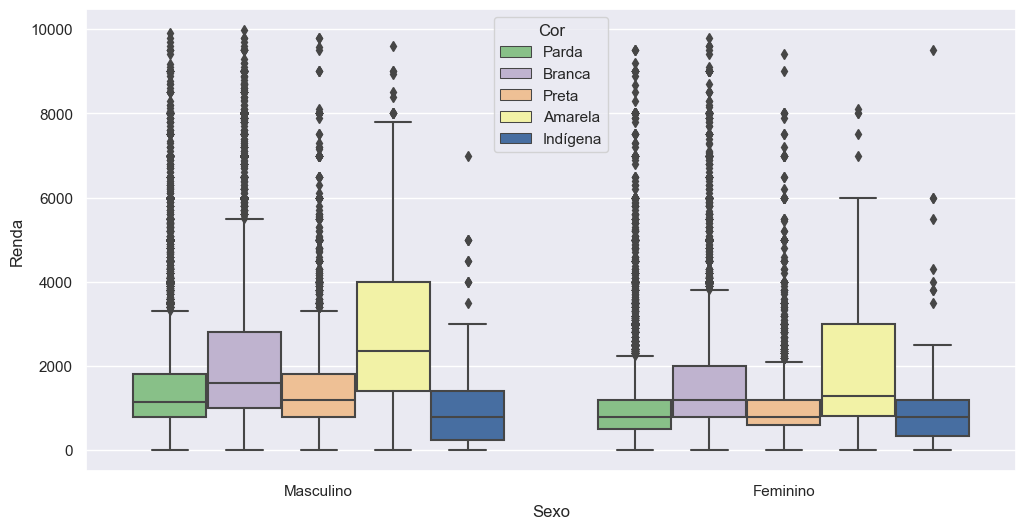

In [113]:
mask = dados['Renda'] < 10000

plot = sns.boxplot(data=dados[mask], x='Sexo', y='Renda', hue='Cor')
plot.figure.set_size_inches(12,6)

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [124]:
from scipy import stats

percentual_salario_min = stats.percentileofscore(dados['Renda'], score=788, kind='weak')
print(f'{round(percentual_salario_min, 2)}%')

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?

In [126]:
q_99 = dados[['Renda']].quantile(q=0.99)[0]
print(f'R$ {q_99:.2f}')

R$ 15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO

In [130]:
estatisticas = (
    dados.groupby(["Anos de Estudo", "Sexo"])["Renda"]
    .agg(["mean", "median", "max", 'std'])
)
estatisticas

mean  median     max  \
Anos de Estudo                 Sexo                                     
1 ano                          Feminino    492.771987   400.0    2000   
                               Masculino   895.629047   788.0   30000   
10 anos                        Feminino    925.919225   800.0    6000   
                               Masculino  1731.270847  1218.0   45000   
11 anos                        Feminino   1286.790889  1000.0  100000   
                               Masculino  2117.060504  1500.0  200000   
12 anos                        Feminino   1682.313725  1200.0  120000   
                               Masculino  2470.330776  1800.0   30000   
13 anos                        Feminino   1911.730047  1300.0   20000   
                               Masculino  3195.099154  2400.0   25000   
14 anos                        Feminino   2226.460457  1600.0   20000   
                               Masculino  3706.620269  2500.0   50000   
15 anos ou mais                Feminino   3899.513231  2800.0  100000   
                               Masculino  6134.279790  4000.0  200000   
2 anos                         Feminino    529.911638   450.0    4000   
                               Masculino   931.178986   788.0   40000   
3 anos                         Feminino    546.853916   500.0    3500   
                               Masculino  1109.203862   800.0   80000   
4 anos                         Feminino    704.279111   788.0   10000   
                               Masculino  1302.329283  1000.0   50000   
5 anos                         Feminino    781.389776   788.0    8000   
                               Masculino  1338.653218  1045.0   35000   
6 anos                         Feminino    833.732824   788.0    6000   
                               Masculino  1448.875419  1200.0   25000   
7 anos                         Feminino    830.751004   788.0    9000   
                               Masculino  1465.497940  1200.0   40000   
8 anos                         Feminino    933.615351   800.0   18000   
                               Masculino  1639.396667  1300.0   30000   
9 anos                         Feminino    868.021700   788.0   20000   
                               Masculino  1508.038850  1200.0   60000   
Não determinados               Feminino    798.174419   788.0    3000   
                               Masculino  1295.761905  1200.0    7000   
Sem instrução e menos de 1 ano Feminino    516.201748   390.0   10000   
                               Masculino   799.494638   700.0   30000   

                                                  std  
Anos de Estudo                 Sexo                    
1 ano                          Feminino    425.291842  
                               Masculino  1331.950552  
10 anos                        Feminino    620.611907  
                               Masculino  2078.609734  
11 anos                        Feminino   1819.040417  
                               Masculino  2676.538942  
12 anos                        Feminino   4851.833513  
                               Masculino  2268.081538  
13 anos                        Feminino   2053.789771  
                               Masculino  2797.116800  
14 anos                        Feminino   2064.083336  
                               Masculino  3987.214974  
15 anos ou mais                Feminino   4212.770709  
                               Masculino  7447.613594  
2 anos                         Feminino    498.234168  
                               Masculino  1435.173827  
3 anos                         Feminino    424.124446  
                               Masculino  2143.800133  
4 anos                         Feminino    629.553397  
                               Masculino  1419.821787  
5 anos                         Feminino    635.782641  
                               Masculino  1484.650587  
6 anos                         Feminino    574.547028  
                    

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

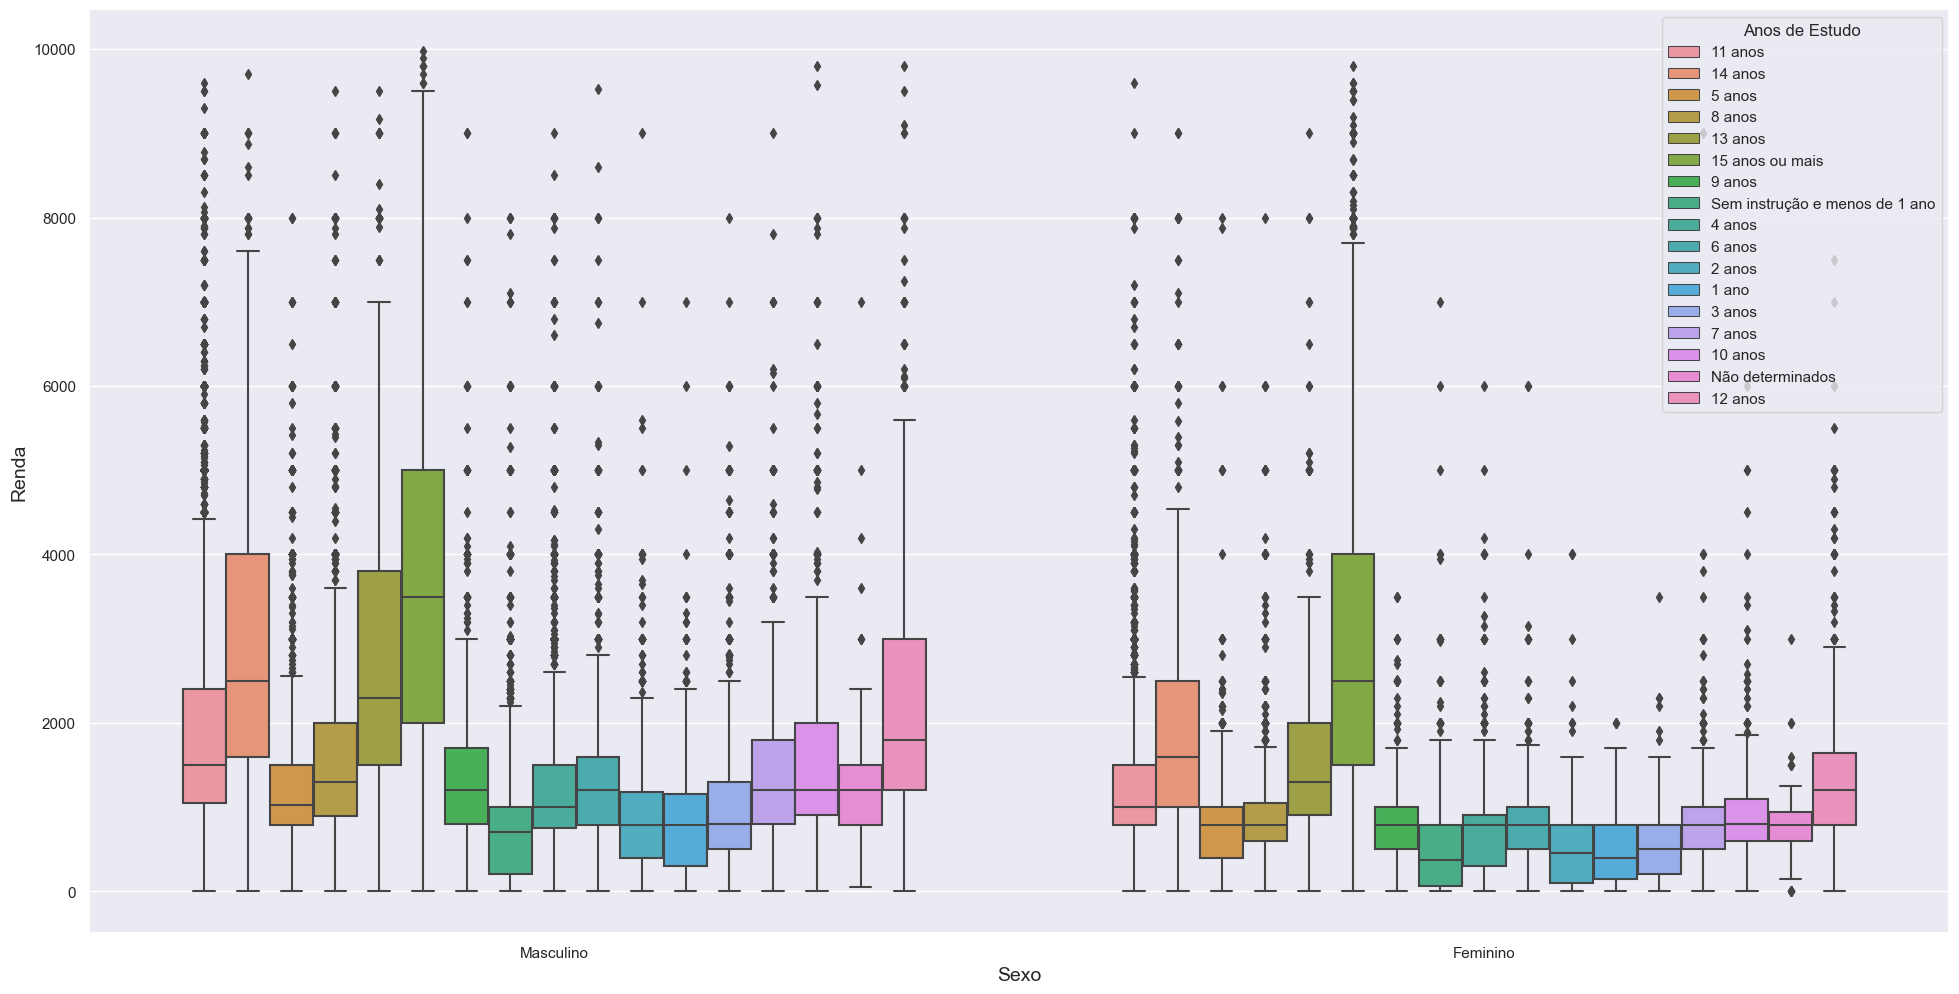

In [118]:
plot = sns.boxplot(data=dados.query("Renda < 10000"), x='Sexo', y='Renda', hue='Anos de Estudo')
plot.set_xlabel('Sexo', fontsize=14)
plot.set_ylabel('Renda', fontsize=14)
plot.figure.set_size_inches(24,12)

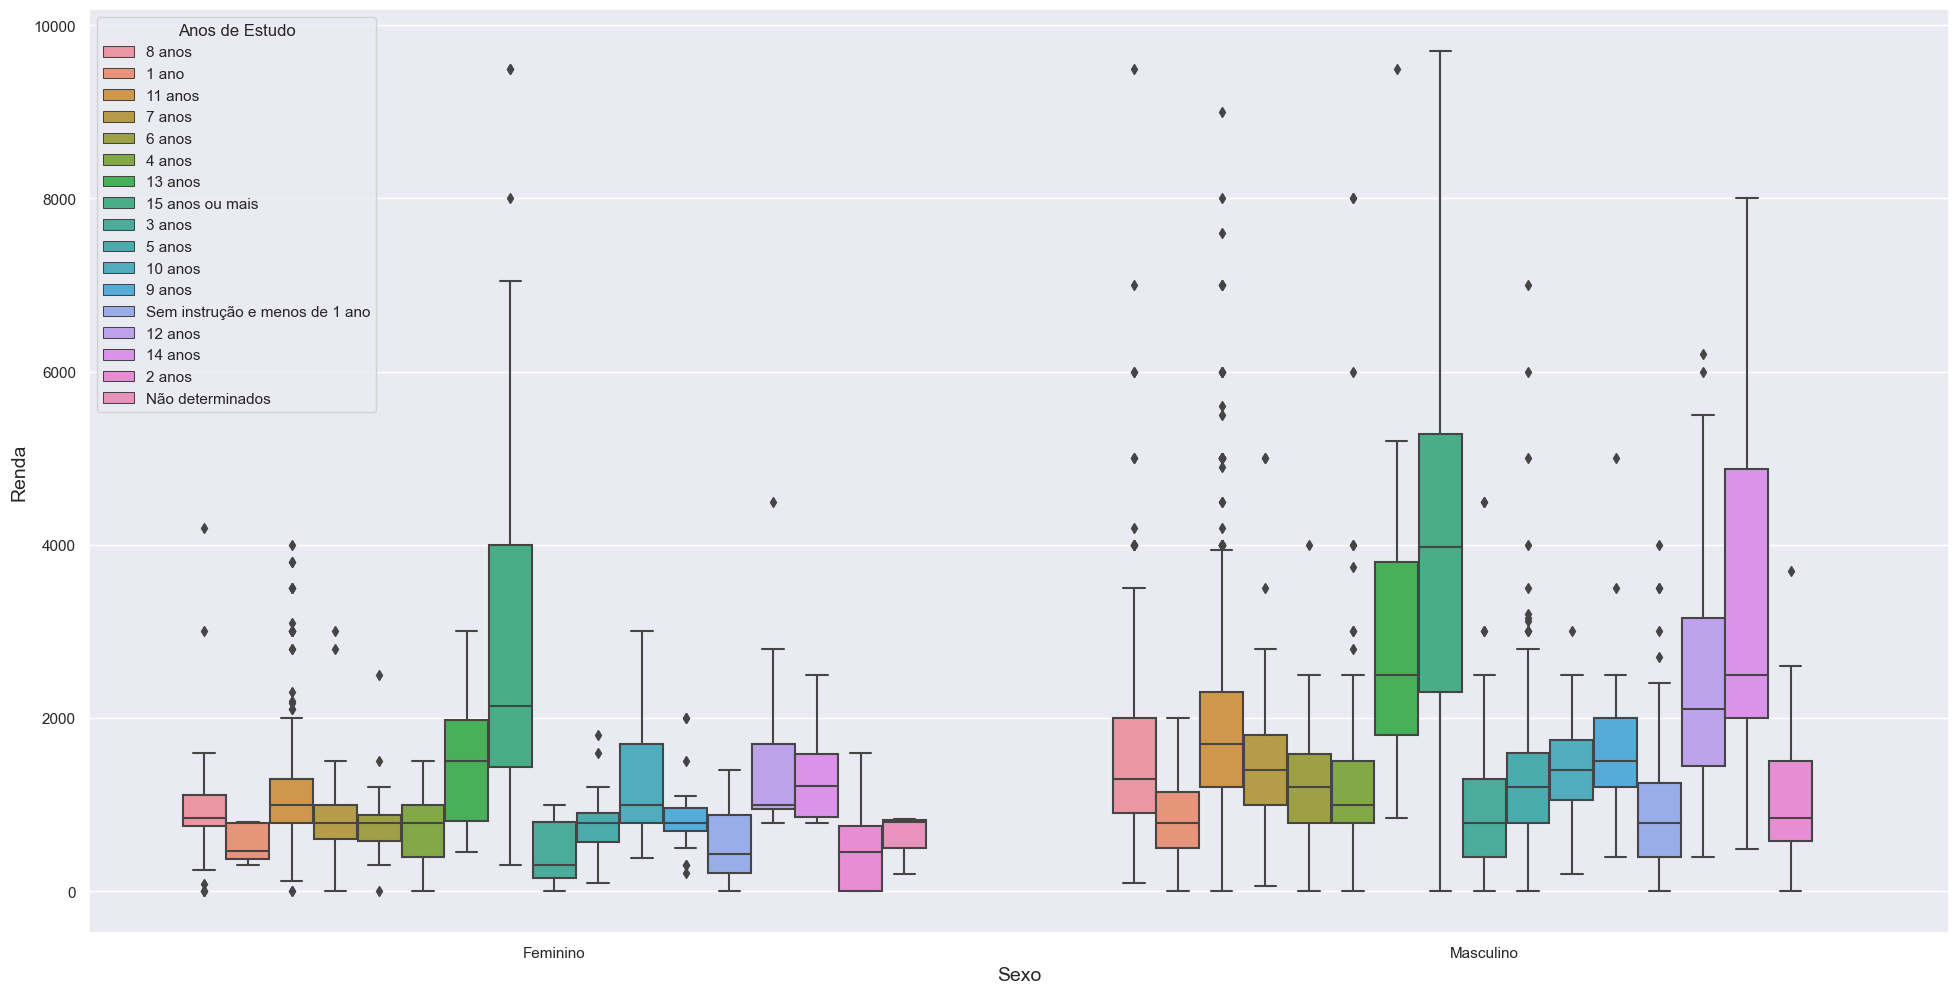

In [119]:
plot = sns.boxplot(data=dados.query("Renda < 10000 and Idade == 40"), x='Sexo', y='Renda', hue='Anos de Estudo')
plot.set_xlabel('Sexo', fontsize=14)
plot.set_ylabel('Renda', fontsize=14)
plot.figure.set_size_inches(24,12)

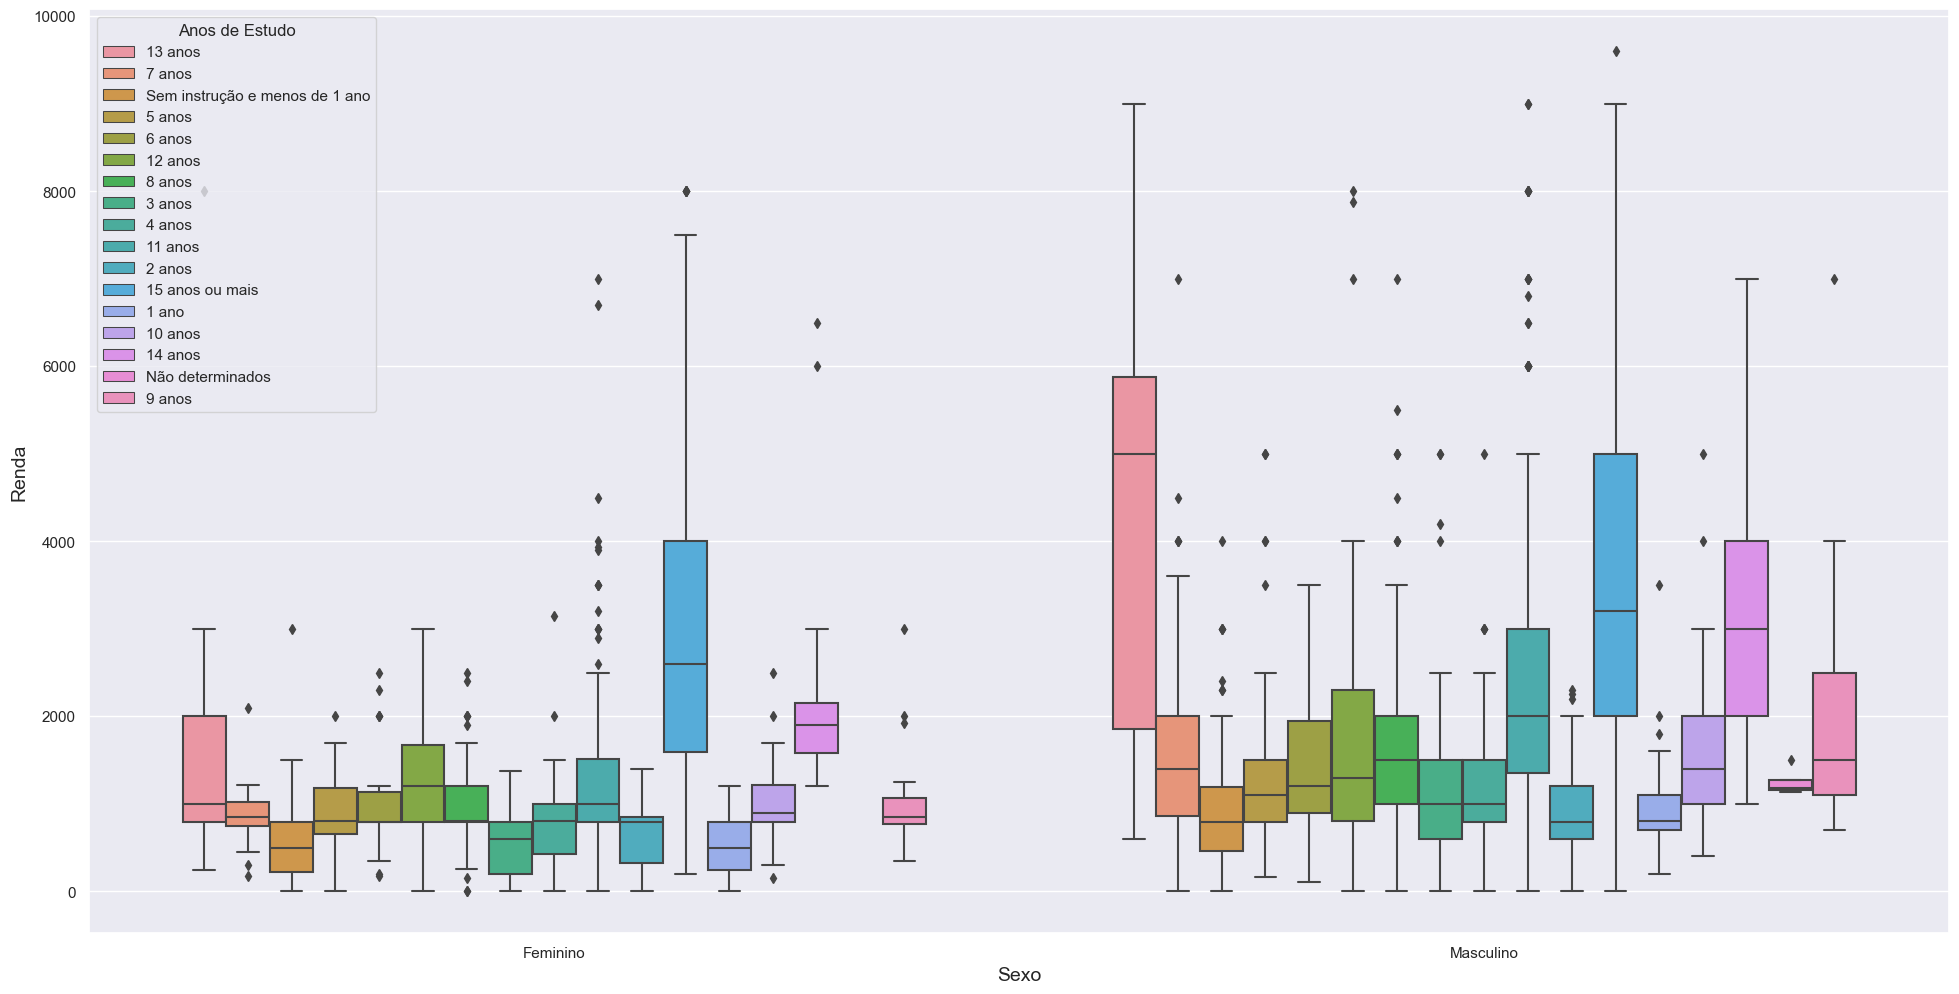

In [120]:
plot = sns.boxplot(data=dados.query("Renda < 10000 and Idade == 50"), x='Sexo', y='Renda', hue='Anos de Estudo')
plot.set_xlabel('Sexo', fontsize=14)
plot.set_ylabel('Renda', fontsize=14)
plot.figure.set_size_inches(24,12)

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO

In [121]:
estatisticas = (
    dados.groupby(["UF"])
    .agg({'Renda':['mean', 'median', 'max', 'std']})
)
estatisticas

Renda                             
                            mean  median     max          std
UF                                                           
Acre                 1506.091782   900.0   30000  2276.233415
Alagoas              1144.552602   788.0   11000  1237.856197
Amapá                1861.353516  1200.0   15580  2020.688632
Amazonas             1445.130100   900.0   22000  1757.935591
Bahia                1429.645094   800.0  200000  3507.917248
Ceará                1255.403692   789.0   25000  1821.963536
Distrito Federal     4241.954722  2000.0  100000  5550.463338
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Goiás                1994.580794  1500.0   30000  2221.933065
Maranhão             1019.432009   700.0   30000  1887.816905
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Paraná               2493.870753  1500.0  200000  4302.937995
Paraíba              1293.370487   788.0   30000  1950.272431
Pará                 1399.076871   850.0   50000  2053.779555
Pernambuco           1527.079319   900.0   50000  2389.622497
Piauí                1074.550784   750.0   40000  2373.355726
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
Rondônia             1789.761223  1200.0   50000  2406.161161
Roraima              1783.588889  1000.0   20000  2079.659238
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Sergipe              1109.111111   788.0   16000  1478.997878
São Paulo            2638.104986  1600.0   80000  3503.777366
Tocantins            1771.094946  1000.0   60000  2934.590741

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO

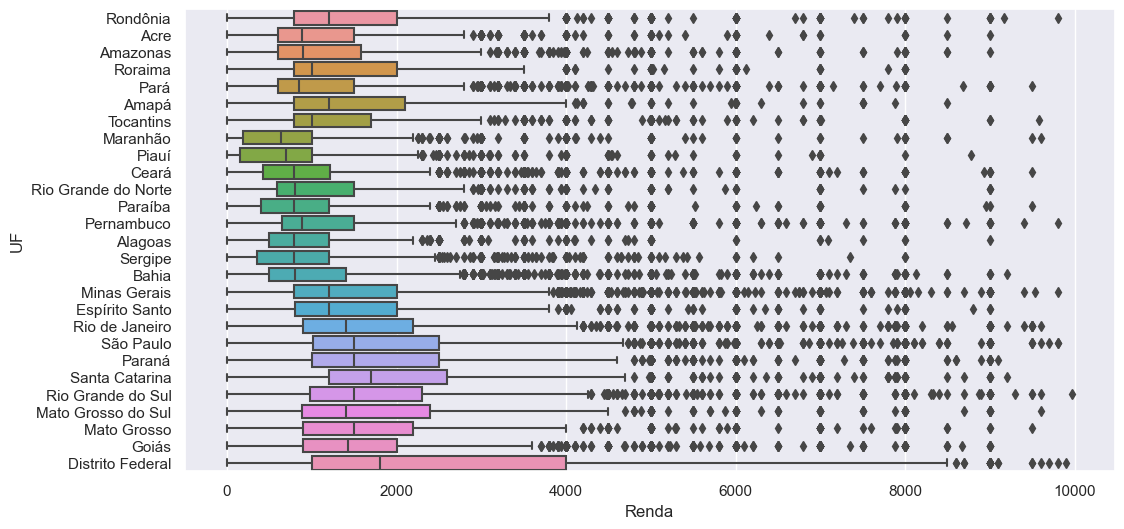

In [122]:
plot = sns.boxplot(data=dados.query('Renda < 10000'), x='Renda', y='UF')
plot.figure.set_size_inches(12,6)

> ### Conclusões

Observa-se que as regiões Sul e Sudeste apresentam uma distribuição de renda mais elevada em comparação com outras regiões.